# Finding Love in Song Lyrics
Richard Lee

<img src="../figs/music_heart.jpg">

This report explores the concept of 'love', especially in song lyrics. There is an abundance of songs out there in the world, ranging from rock to R&B to pop to hip hop to country. Every theme has their own style of music; however, one usually dintinguishes each theme by the way the music sounds and not so much by the lyrics. Can certain types of music - such as metal - still portray some aspect of love and romance? In this dataset, I will be exploring the theme of love in songs and the lyrics.  

Some questions that I delve into are:
1. What genre should I listen to if I want to listen to romantic music?
2. Has the theme of love in music transformed over the years?
3. Who are the best artists to listen to for songs about love?
4. What is the most romantic song?

## I. Processing and Cleaning Data

First, I loaded the data lyrics.csv, which can be found at https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics. I cleaned the data by removing duplicate rows, removing rows with NULL values, and cleaning up the lyrics column by removing any type of unneccary characters such as '\n', '[', and ']'. This was then saved in the output folder as lyrics_clean.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/lyrics.csv')
df.head()

,song,year,artist,genre,lyrics
0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...
1,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...
2,Feb-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...
3,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125793 entries, 0 to 125792
Data columns (total 5 columns):
song      125793 non-null object
year      125722 non-null object
artist    125717 non-null object
genre     125716 non-null object
lyrics    125715 non-null object
dtypes: object(5)
memory usage: 4.8+ MB


In [3]:
df_clean = df.drop_duplicates()
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125715 entries, 0 to 125792
Data columns (total 5 columns):
song      125715 non-null object
year      125715 non-null object
artist    125715 non-null object
genre     125715 non-null object
lyrics    125715 non-null object
dtypes: object(5)
memory usage: 5.8+ MB


In [4]:
df_clean = df_clean.replace({'\n': ' '}, regex = True)
df_clean = df_clean.replace({']': ' '}, regex = True)
df_clean['lyrics'] = df_clean['lyrics'].str.strip('[')
df_clean.to_csv('../output/lyrics_clean.csv')
df_clean.head()

,song,year,artist,genre,lyrics
0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home It w...
1,careless-whisper,2009,a,Hip-Hop,I feel so unsure As I take your hand and lead ...
2,Feb-59,2007,a,Hip-Hop,Mark: Sunday football I got boot off the pitc...
3,power-of-desire,2007,a,Hip-Hop,Chris: Fallin' for a fantasy I threw away my ...
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch you hold my hand...


# II. Exploring Dataset

In this section, I take a look at the dataset. What I find is that this dataset comprises mostly of **Rock** as the genre. It makes up over **50%** of the dataset. The second-most genre that in the dataset is **Pop**, which makes up **less than 15%** of the dataset. Following is **Metal** which makes up **less than 9%** of the dataset. 

In terms of artists, this dataset is composed of **2535 different artists**, and the one with the highest count is **Dolly Parton** with a count of 717. Following Dolly Parton is **Elton John** with a count of 619. 

The dataset ranges from **years 1968 to 2016**. This gives us the context with the dataset we are working with. 

In [5]:
df_clean.genre.value_counts()

Rock             64850
Pop              18698
Metal            11311
Hip-Hop           8905
Country           7534
Jazz              4123
Not Available     3325
Electronic        2815
R&B               2175
Indie             1318
Folk               514
Other              147
Name: genre, dtype: int64

In [6]:
df_clean.artist.value_counts().head()

dolly-parton    717
elton-john      619
chris-brown     596
bee-gees        577
bob-dylan       563
Name: artist, dtype: int64

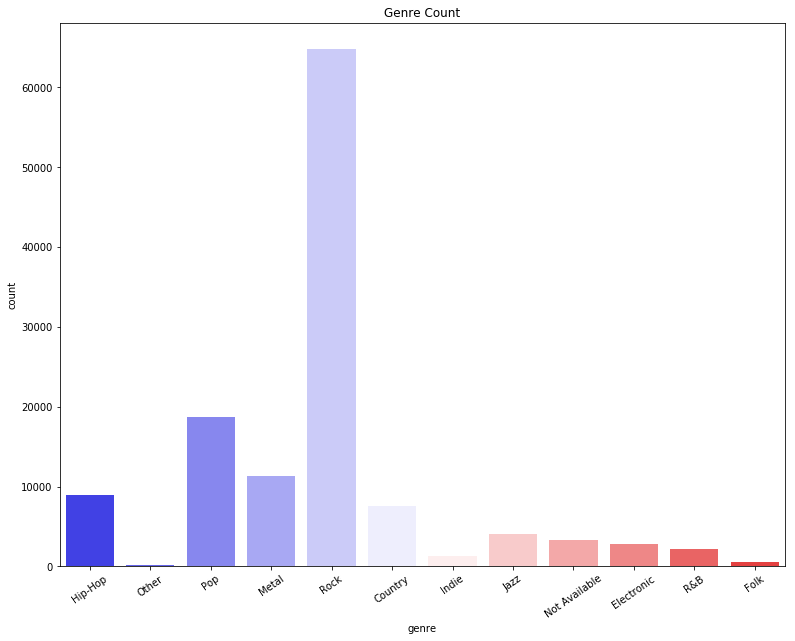

In [7]:
plt.figure(figsize = (13,10))
genreplot = sns.countplot(x = "genre", data = df_clean, palette = "bwr")
genreplot.set_xticklabels(genreplot.get_xticklabels(), rotation = 35)
plt.title('Genre Count')
plt.show()

As can be seen in this chart, the dataset is comprised mainly of rock. As a result, one of the methodologies is to view the weightings as a percentage rather than a total count. This will be shown in the later graphs.

# III. Which genre has the most love/romance?

How can we capture whether or not a song shows love or romance based on the lyrics itself? Most of the time, when I listen to a song, I tend to focus more on the sound and music rather than the lyrics themselves. The music usually portrays a mood and atmosphere and it alone can emit a mood such as happiness or sadness. 

To capture love or romance without listening to the music requires the identification of the words in the lyrics. This is especially true in rap, where the focus is more so on the lyrics than the music itself. However, this is still true for all other genres - the lyrics is essentially the backbone of the song. It establishes the main idea of the song and it can portray a feeling in and of itself. 

How do I know if a song shows love of romance? Words such as **adorable, angel, beautiful, darling, gorgeous, love, heavenly, sweetheart, dream, cherish** emit a feeling of love and romance. An even stronger portrayal of love and romance is not just one word, but **a linkage of words: 'I love you', 'love for you', 'my heart', 'need you'.**

In this section of the notebook, I create different functions and algorithms to capture these romantic words and phrases and weigh them appropriately. "I love you" emits a stronger feeling of love than just the word "angel" or "sweetheart".

In [8]:
def wordCount(string, word):
    wordlist = str(string)
    wordlist = wordlist.split(" ")
    count = 0
    for i in range(0, len(wordlist)):
        if (word == wordlist[i]):
            count = count + 1
    return count

In [9]:
def loveCount(string):
    wordlist = str(string)
    wordlist = wordlist.split(" ")
    count = 0
    for i in range(0, len(wordlist)):
        if ('love' == wordlist[i]):
            count = count + 1
    return count

In [10]:
def totalWords(string):
    wordlist = str(string)
    wordlist = wordlist.split(" ")
    return len(wordlist)

In [11]:
def phraseCount(string, phrase):
    wordlist = str(string)
    wordlist = wordlist.split(" ")
    count = 0
    for i in range(len(wordlist) - len(phrase)+1):
        if (phrase == wordlist[i:i+len(phrase)]):
            count = count + 1
    return count

In [12]:
df_clean['adorable'] = df_clean['lyrics'].apply(lambda x: x.count('adorable'))
df_clean['angel'] = df_clean['lyrics'].apply(lambda x: x.count('angel'))
df_clean['beautiful'] = df_clean['lyrics'].apply(lambda x: x.count('beautiful'))
df_clean['gorgeous'] = df_clean['lyrics'].apply(lambda x: x.count('gorgeous'))
df_clean['sweetheart'] = df_clean['lyrics'].apply(lambda x: x.count('sweetheart'))
df_clean['I love you'] = df_clean['lyrics'].apply(lambda x: x.count('I love you'))
df_clean['need you'] = df_clean['lyrics'].apply(lambda x: x.count('need you'))
df_clean['love for you'] = df_clean['lyrics'].apply(lambda x: x.count('love for you'))
df_clean['my heart'] = df_clean['lyrics'].apply(lambda x: x.count('my heart'))
df_clean['love_count'] = df_clean['lyrics'].apply(loveCount)
df_clean['love_count'] = df_clean['lyrics'].apply(loveCount)
df_clean['total_words'] = df_clean['lyrics'].apply(totalWords)
df_clean['love%'] = df_clean['love_count']/df_clean['total_words']
df_clean['romance_level'] = df_clean['adorable'] + df_clean['angel'] + df_clean['beautiful'] + df_clean['gorgeous'] + df_clean['sweetheart'] + 5*(df_clean['I love you'] + df_clean['need you'] + df_clean['love for you'] + df_clean['my heart'])
df_clean.head()

,song,year,artist,genre,lyrics,adorable,angel,beautiful,gorgeous,sweetheart,I love you,need you,love for you,my heart,love_count,total_words,love%,romance_level
0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home It w...,0,0,0,0,0,0,0,0,0,0,107,0.000000,0
1,careless-whisper,2009,a,Hip-Hop,I feel so unsure As I take your hand and lead ...,0,0,0,0,0,0,0,0,0,1,300,0.003333,0
2,Feb-59,2007,a,Hip-Hop,Mark: Sunday football I got boot off the pitc...,0,0,0,0,0,0,0,0,0,0,390,0.000000,0
3,power-of-desire,2007,a,Hip-Hop,Chris: Fallin' for a fantasy I threw away my ...,0,0,0,0,0,0,0,1,1,1,156,0.006410,10
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch you hold my hand...,0,0,0,0,0,0,0,0,0,7,125,0.056000,0


In [13]:
love_genre = df_clean.groupby('genre').mean()
love_genre

,adorable,angel,beautiful,gorgeous,sweetheart,I love you,need you,love for you,my heart,love_count,total_words,love%,romance_level
genre,,,,,,,,,,,,,
Country,0.001062,0.073002,0.051367,0.000133,0.016857,0.101540,0.041280,0.009955,0.206530,1.316830,191.333024,0.007890,1.938943
Electronic,0.000355,0.045115,0.056128,0.002131,0.000710,0.066785,0.060036,0.007105,0.200355,1.249734,203.535702,0.006104,1.775844
Folk,0.001946,0.077821,0.066148,0.003891,0.003891,0.054475,0.003891,0.005837,0.114786,0.821012,222.587549,0.004453,1.048638
Hip-Hop,0.000449,0.032341,0.057720,0.004155,0.004043,0.087030,0.053341,0.012128,0.082201,1.275576,531.677035,0.002847,1.272207
Indie,0.000759,0.043247,0.055387,0.002276,0.000759,0.056146,0.053869,0.001517,0.168437,0.876328,196.780728,0.004705,1.502276
Jazz,0.001213,0.066699,0.053117,0.000728,0.022071,0.150133,0.048508,0.015038,0.279166,1.605384,167.484599,0.010212,2.608052
Metal,0.000088,0.082840,0.029352,0.000442,0.000265,0.011670,0.017328,0.001591,0.095836,0.301034,189.301123,0.001439,0.745115
Not Available,0.000301,0.065263,0.065564,0.005113,0.003008,0.095338,0.074586,0.006316,0.180451,1.420150,223.214135,0.006581,1.922707
Other,0.006803,0.136054,0.054422,0.000000,0.000000,0.054422,0.027211,0.000000,0.163265,1.244898,261.074830,0.006411,1.421769


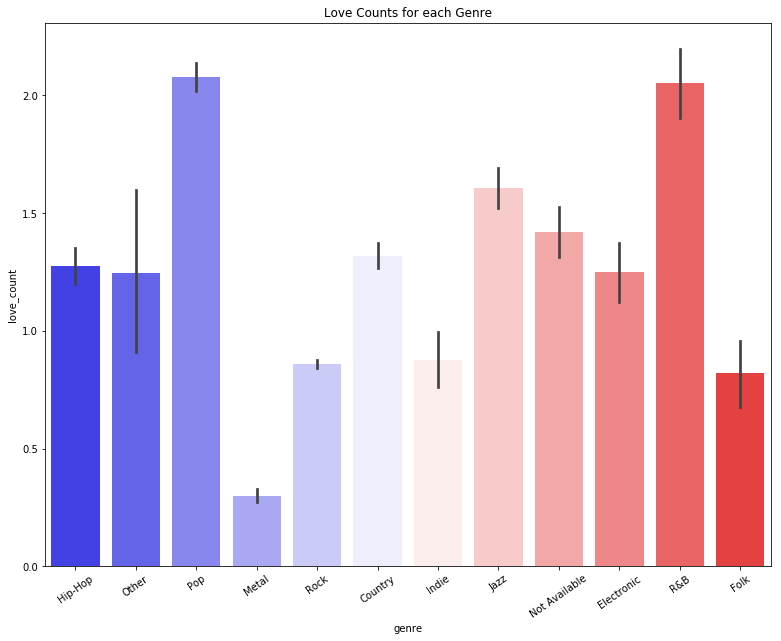

In [14]:
plt.figure(figsize = (13,10))
lovecount_genre = sns.barplot(x = "genre", y = "love_count", data = df_clean, palette = "bwr")
lovecount_genre.set_xticklabels(lovecount_genre.get_xticklabels(), rotation = 35)
plt.title("Love Counts for each Genre")
plt.show()

R&B and Pop display the highest amounts of love counts, while Metal displays the least.

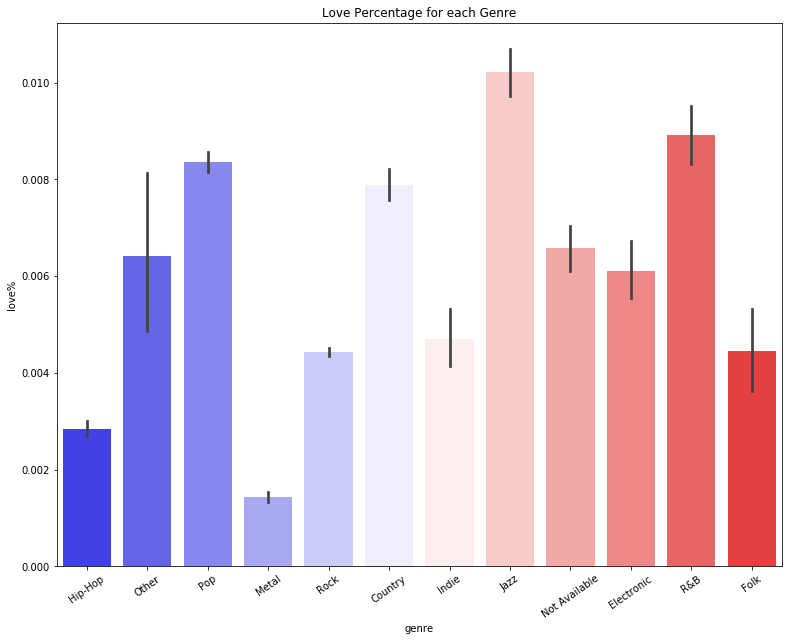

In [15]:
plt.figure(figsize = (13,10))
love_perc_genre = sns.barplot(x = "genre", y = "love%", data = df_clean, palette = "bwr")
love_perc_genre.set_xticklabels(love_perc_genre.get_xticklabels(), rotation = 35)
plt.title("Love Percentage for each Genre")
plt.show()

Jazz displays the highest percentage of love in terms of number of words - while Metal displays the lowest percentage

In [16]:
df_clean['love_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,7534.0,1.316830,2.295238,0.0,0.0,0.0,2.0,30.0
Electronic,2815.0,1.249734,3.565981,0.0,0.0,0.0,1.0,60.0
Folk,514.0,0.821012,1.690204,0.0,0.0,0.0,1.0,13.0
Hip-Hop,8905.0,1.275576,3.551946,0.0,0.0,0.0,1.0,80.0
Indie,1318.0,0.876328,2.191452,0.0,0.0,0.0,1.0,31.0
Jazz,4123.0,1.605384,3.035411,0.0,0.0,0.0,2.0,48.0
Metal,11311.0,0.301034,1.542099,0.0,0.0,0.0,0.0,60.0
Not Available,3325.0,1.420150,3.114446,0.0,0.0,0.0,1.0,38.0
Other,147.0,1.244898,2.131280,0.0,0.0,0.0,2.0,12.0


In [17]:
df_clean['love%'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,7534.0,0.007890,0.013774,0.0,0.0,0.0,0.010688,0.138889
Electronic,2815.0,0.006104,0.015912,0.0,0.0,0.0,0.005714,0.354167
Folk,514.0,0.004453,0.009463,0.0,0.0,0.0,0.005109,0.063492
Hip-Hop,8905.0,0.002847,0.008289,0.0,0.0,0.0,0.002278,0.230769
Indie,1318.0,0.004705,0.010988,0.0,0.0,0.0,0.004603,0.097826
Jazz,4123.0,0.010212,0.016059,0.0,0.0,0.0,0.015152,0.134831
Metal,11311.0,0.001439,0.005464,0.0,0.0,0.0,0.000000,0.148000
Not Available,3325.0,0.006581,0.013694,0.0,0.0,0.0,0.007353,0.197917
Other,147.0,0.006411,0.010498,0.0,0.0,0.0,0.009756,0.057416


Surprisingly, there is an Electronic song that displays the highest percentage of love per words in its lyrics

In [18]:
df_clean['romance_level'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,7534.0,1.938943,5.295213,0.0,0.0,0.0,0.0,120.0
Electronic,2815.0,1.775844,7.111998,0.0,0.0,0.0,0.0,135.0
Folk,514.0,1.048638,3.485359,0.0,0.0,0.0,0.0,30.0
Hip-Hop,8905.0,1.272207,6.259047,0.0,0.0,0.0,0.0,205.0
Indie,1318.0,1.502276,6.129053,0.0,0.0,0.0,0.0,90.0
Jazz,4123.0,2.608052,6.447613,0.0,0.0,0.0,2.0,95.0
Metal,11311.0,0.745115,3.785497,0.0,0.0,0.0,0.0,180.0
Not Available,3325.0,1.922707,6.162977,0.0,0.0,0.0,0.0,130.0
Other,147.0,1.421769,4.050918,0.0,0.0,0.0,0.0,28.0


Here, we see that R&B, on average, displays the highest romance level. We also see that Pop has a max of 395. Which song is this? We will find out in section 6. 

#### Summary Analysis of Section 3

It is not surprising that the top three genres that display romance is R&B, Pop, and Jazz respectively. Metal displays the least amount of romance. What is surprising though, is that Jazz has the highest percentage of love. This means that based on the total number of words sang in the lyrics, Jazz has the densest amount of love in its lyrics. 

So, if I want to listen to a song that has the most 'love' per line, I would choose Jazz over R&B or Pop. 

# IV. How has love in music transformed over the years?

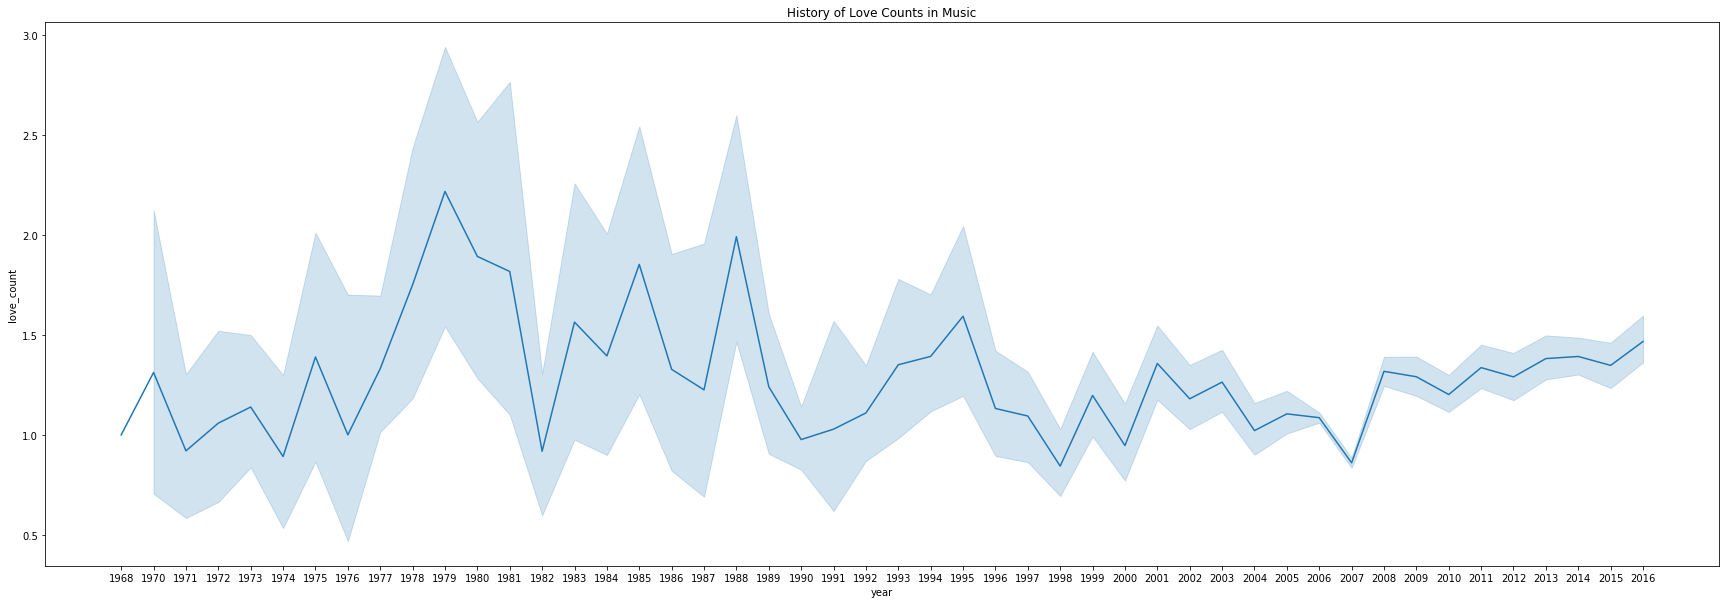

In [19]:
indexYears = df_clean[(df_clean['year'] == '112')].index
df_clean.drop(indexYears, inplace = True)
indexYears = df_clean[(df_clean['year'] == '702')].index
df_clean.drop(indexYears, inplace = True)
df_clean['love%'].groupby(df_clean['year']).describe()
plt.figure(figsize = (30,10))
love_perc_genre = sns.lineplot(x = "year", y = "love_count", data = df_clean, palette = "bwr")
plt.title("History of Love Counts in Music")
plt.show()

There are multiple peaks in romance level in songs throughout 1968 and 2016. One of the peaks is in 1988, but the highest one is in 1979. 

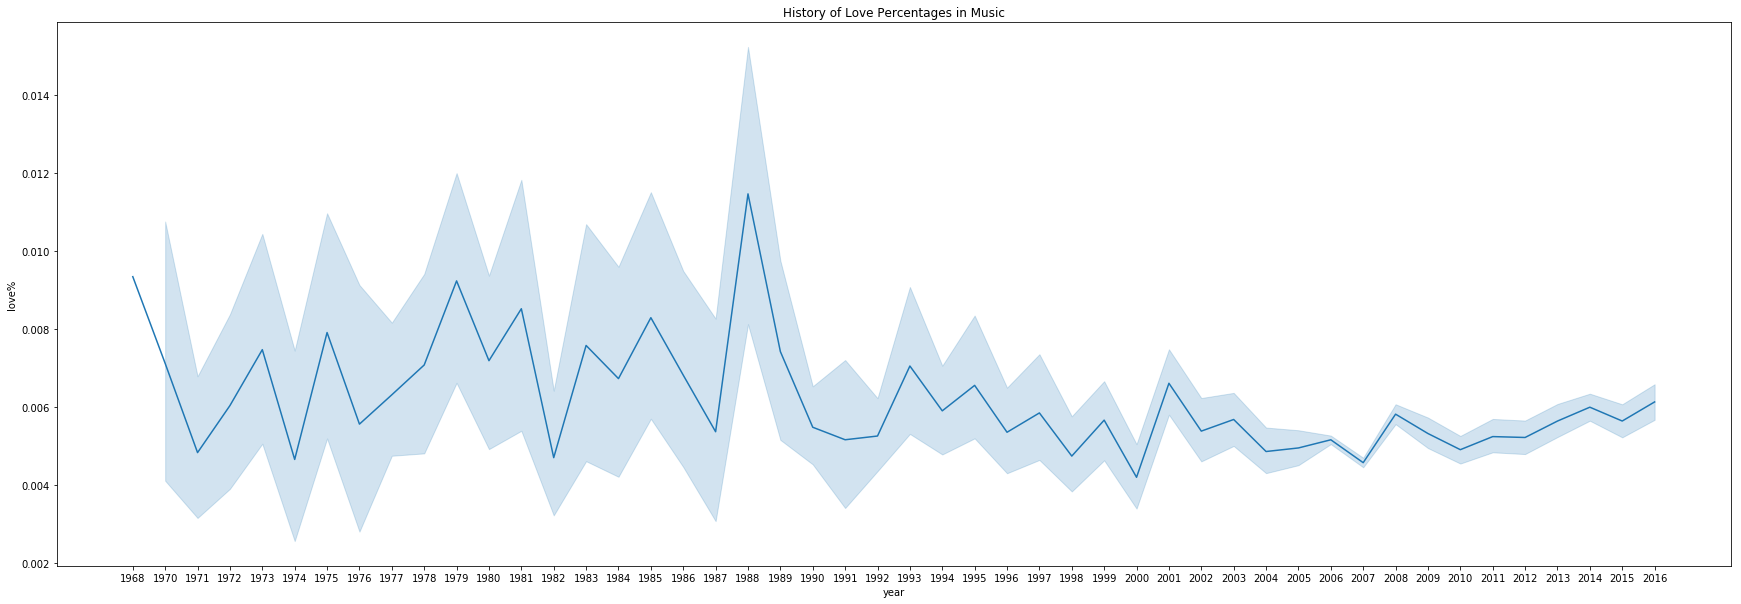

In [20]:
plt.figure(figsize = (30,10))
love_history = sns.lineplot(x = "year", y = "love%", data = df_clean, palette = "bwr")
plt.title("History of Love Percentages in Music")
plt.show()

From 1968 to 2016, year 1988 displays the most songs with the highest level of love based on the number of words for each song.

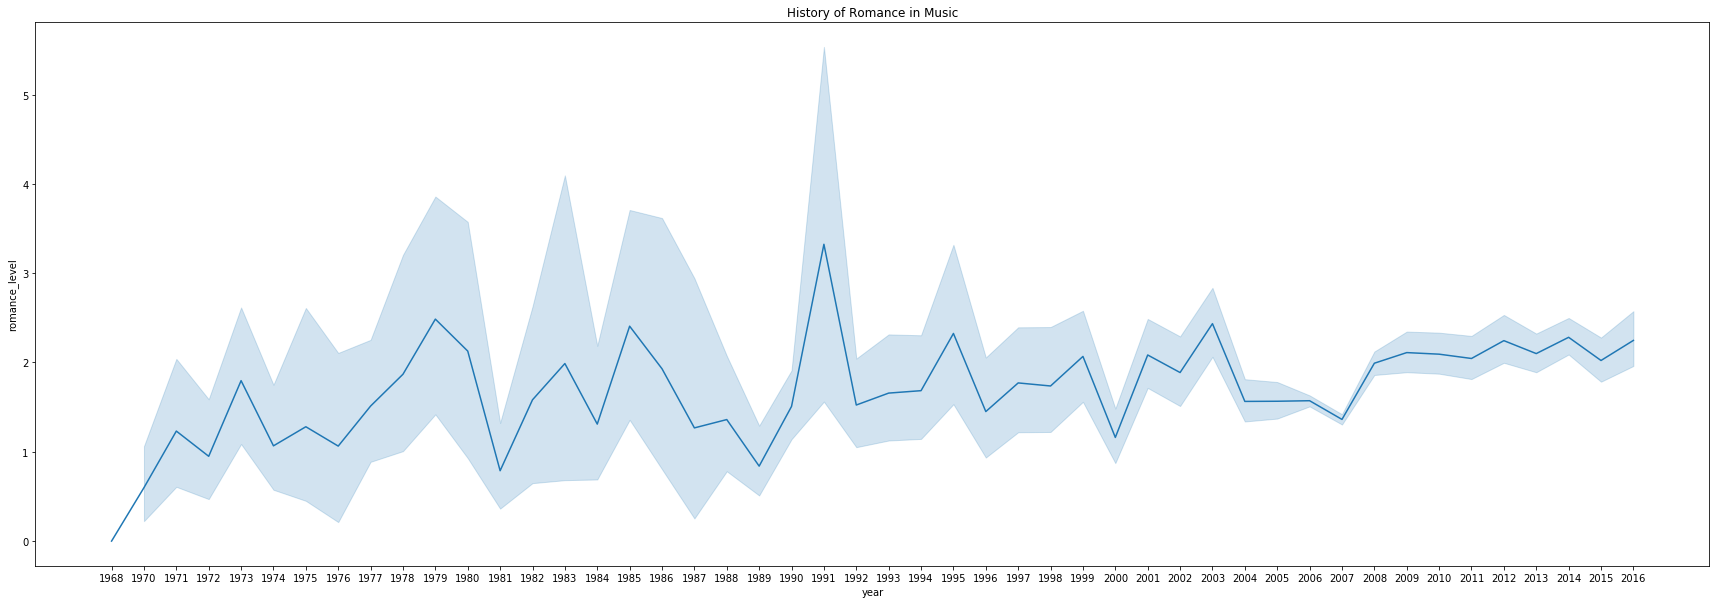

In [21]:
plt.figure(figsize = (30,10))
love_history = sns.lineplot(x = "year", y = "romance_level", data = df_clean, palette = "bwr")
plt.title("History of Romance in Music")
plt.show()

There is an overall upward progession of romance level throughout the years. Romance level peaked at year 1991.

#### Summary Analysis of Section 4

The best time for romance music is around 1988 to 1991. This is the time where the songs had lyrics that talked about love. Could this be linked to the Cold War which died down in the late 1980s. Who knows? What we do know is that the late 1980's had the highest level of love and peaked at 1991 with the highest romance level. 

# V. Who are the best artists/songs to listen to for love?

After the all the analysis on love counts, word counts, best genre, and history of love - I simply just want to Youtube a song that has the most romance in it. In this section, I am finding the best artist to follow and the best song to listen to for love. 

In [22]:
df_clean.nlargest(3, 'romance_level')[['song','artist']]

,song,artist
88180,now-i-need-you,donna-summer
117139,suspicion,gene-loves-jezebel
59310,i-love-you,chris-brown


In [23]:
df_clean.nlargest(3, 'love_count')[['song','artist']]

,song,artist
50148,i-love-my-bitch,busta-rhymes
50309,i-love-my-bitch-album-version-explicit,busta-rhymes
50317,i-love-my-bi,busta-rhymes


#### Summary Analysis of Section 5

The song with the highest level of romance is 'Now I Need You' by Donna Summer. After listening to it on Youtube, the song is not really my cup of tea. Although I personally did not dig the music, the lyrics portray a lot of romance: 

"Having learned to live with you
It's hard to live without you
You always said if I were down,
To cheer me you would be around
Now l need you, l need you, l need you, l need you"

However, I did find another song that I liked by looking at the top three songs that had the most 'love' count in it.

And that song is ... "I love my b*tch" by Busta Rhymes. I might just start jamming to this song from now on - it has a catchy beat. 

# VI. Conclusion

1. The top three genres to listen to for love are R&B, Pop, and Jazz
2. The time period for songs with most love is between 1988 and 1991
3. In terms of lyrics, the most romantic songs are "Now I need you" by Donna Summer, "Suspician" by Gene Loves Jezebel, and "I love you" by Chris Brown
4. I found a new catchy song ("I love my b*tch" by Busta Rhymes) which is the song with the most 'love' count in it